In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
# define some imp parameters:


RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
EPOCHS = 200
TEST_SIZE = 0.2



# Read the data:
    

In [3]:

data_df = pd.read_csv('wine.csv')
data_df

,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,1
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
173,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
data_df = pd.read_csv('wine.csv', header = None)
data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


# Perform basic operation on dataset:

In [5]:
# check is null present:
data_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [6]:
# print info:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# find basic statistic:

data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [8]:
# find the shape:

data_df.shape

(178, 14)

In [9]:
# find out the unique value:

for col in data_df.columns:
    print(f'col: {col} | {data_df[col].unique()}')

col: 0 | [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
col: 1 | [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.

In [10]:
# fins the correlation:

data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

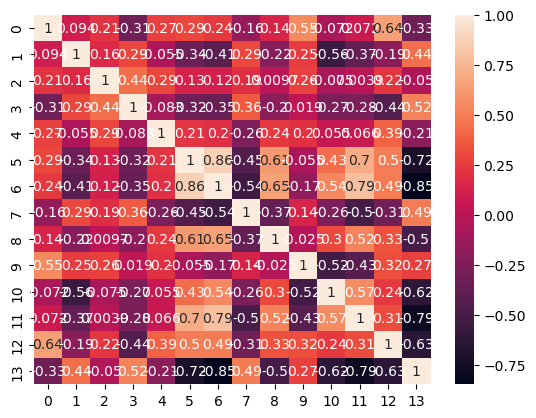

In [11]:
# plot the heatmap:

sns.heatmap(data = data_df.corr(), annot = True)

In [12]:
# define y:

labels = data_df[data_df.columns[-1]]
labels

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 13, Length: 178, dtype: int64

In [13]:
# define  X:

feature_df = data_df.drop(data_df.columns[-1], axis =1)
feature_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [14]:
X_train,X_test,y_train,y_test = train_test_split(feature_df,labels, 
                                                stratify=labels,
                                                test_size=TEST_SIZE,
                                                random_state = RANDOM_STATE)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [15]:
# apply std and label encoder:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



In [33]:
# for signature of tf:

#tf.keras.layers.Dense?

In [17]:
# create a tensorflow model:

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(8,
                               activation='relu',
                               kernel_regularizer=None))

model.add(tf.keras.layers.Dense(3))     # output layer
model

<Sequential name=sequential, built=False>

In [18]:
# define loss_fn and compile the model:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

model.compile(loss = loss_fn, optimizer = 'adam', metrics=['accuracy'])



In [19]:
# fit the model:

hist = model.fit(X_train, y_train, 
                 epochs = EPOCHS, 
                 validation_data = [X_test, y_test])

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.1483 - loss: 1.4647 - val_accuracy: 0.1111 - val_loss: 1.4436
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2062 - loss: 1.4201 - val_accuracy: 0.1111 - val_loss: 1.3975
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2135 - loss: 1.3784 - val_accuracy: 0.1389 - val_loss: 1.3520
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2158 - loss: 1.3384 - val_accuracy: 0.1944 - val_loss: 1.3061
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2339 - loss: 1.3000 - val_accuracy: 0.2222 - val_loss: 1.2613
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2794 - loss: 1.2635 - val_accuracy: 0.2778 - val_loss: 1.2184
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2949 - loss: 1.2286 - val_accuracy: 0.3056 - val_loss: 1.1773
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3104 - loss: 1.1948 - val_accuracy: 0.4167 - val_loss

Epoch 52/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8894 - loss: 0.3928 - val_accuracy: 0.9722 - val_loss: 0.3091
Epoch 53/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8894 - loss: 0.3834 - val_accuracy: 0.9722 - val_loss: 0.3006
Epoch 54/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8894 - loss: 0.3744 - val_accuracy: 0.9722 - val_loss: 0.2924
Epoch 55/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8931 - loss: 0.3655 - val_accuracy: 0.9722 - val_loss: 0.2845
Epoch 56/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9063 - loss: 0.3569 - val_accuracy: 0.9722 - val_loss: 0.2769
Epoch 57/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9063 - loss: 0.3485 - val_accuracy: 0.9722 - val_loss: 0.2696
Epoch 58/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9086 - loss: 0.3403 - val_accuracy: 0.9722 - val_loss: 0.2625
Epoch 59/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9086 - loss: 0.3323 - val_accuracy: 0.9722 - v

Epoch 103/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9700 - loss: 0.1437 - val_accuracy: 1.0000 - val_loss: 0.1009
Epoch 104/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9700 - loss: 0.1416 - val_accuracy: 1.0000 - val_loss: 0.0993
Epoch 105/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9700 - loss: 0.1396 - val_accuracy: 1.0000 - val_loss: 0.0977
Epoch 106/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9700 - loss: 0.1376 - val_accuracy: 1.0000 - val_loss: 0.0962
Epoch 107/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9700 - loss: 0.1357 - val_accuracy: 1.0000 - val_loss: 0.0947
Epoch 108/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9700 - loss: 0.1338 - val_accuracy: 1.0000 - val_loss: 0.0933
Epoch 109/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9700 - loss: 0.1319 - val_accuracy: 1.0000 - val_loss: 0.0919
Epoch 110/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9700 - loss: 0.1301 - val_accuracy: 1.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9736 - loss: 0.0788 - val_accuracy: 1.0000 - val_loss: 0.0552
Epoch 154/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9736 - loss: 0.0780 - val_accuracy: 1.0000 - val_loss: 0.0548
Epoch 155/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9736 - loss: 0.0772 - val_accuracy: 1.0000 - val_loss: 0.0543
Epoch 156/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9736 - loss: 0.0765 - val_accuracy: 1.0000 - val_loss: 0.0539
Epoch 157/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9736 - loss: 0.0758 - val_accuracy: 1.0000 - val_loss: 0.0534
Epoch 158/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9736 - loss: 0.0750 - val_accuracy: 1.0000 - val_loss: 0.0530
Epoch 159/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9736 - loss: 0.0743 - val_accuracy: 1.0000 - val_loss: 0.0526
Epoch 160/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9736 - loss: 0.0736 - val_accuracy: 1.0000 - val_los

In [20]:
# create a dataframe to loss_fn:

loss_df = pd.DataFrame(hist.history)
loss_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.133803,1.450916,0.111111,1.443563
1,0.190141,1.406437,0.111111,1.397501
2,0.204225,1.364619,0.138889,1.351982
3,0.211268,1.324595,0.194444,1.306076
4,0.239437,1.286387,0.222222,1.261301


<Axes: >

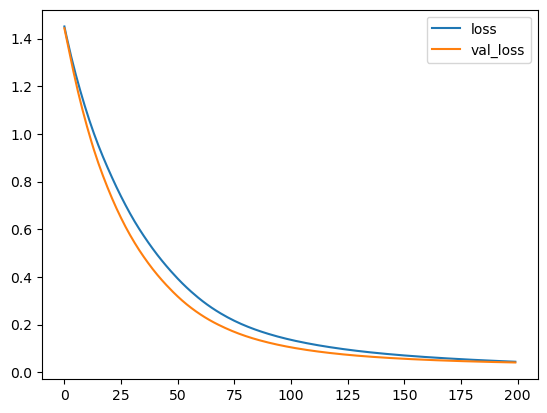

In [21]:
# plt the loss:

loss_df.plot(y = ['loss', 'val_loss'])

<Axes: >

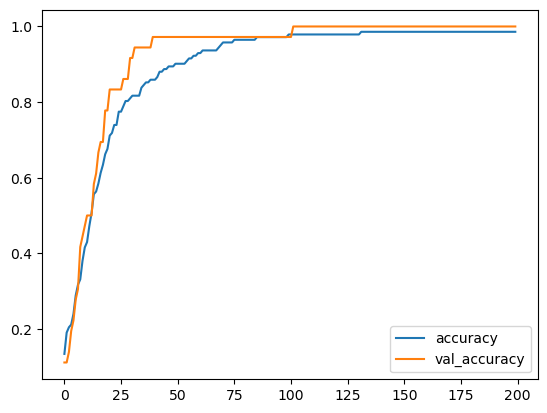

In [23]:
# plt the accuracy:

loss_df.plot(y = ['accuracy', 'val_accuracy'])

# Evaluate the model:

In [27]:
y_pred = model.predict(X_test)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


array([[-0.8096402 ,  7.9708943 , -1.3932345 ],
       [-2.257817  ,  2.316467  ,  5.255588  ],
       [-0.2614609 ,  8.53584   , -1.4784454 ],
       [ 4.3243284 ,  1.691168  , -0.03292218],
       [10.021037  ,  2.3055277 ,  0.73395675],
       [-1.2641284 ,  2.385431  ,  2.105197  ],
       [-1.7490995 ,  0.5770491 ,  6.5449553 ],
       [ 4.2185516 ,  5.8259034 , -1.0622112 ],
       [ 4.835257  ,  2.213499  , -0.12908511],
       [ 6.077882  ,  0.43364686,  0.6832422 ],
       [-1.6788254 ,  2.9070883 ,  0.31407595],
       [ 1.8934731 ,  5.3417263 , -1.4234972 ],
       [-2.611425  ,  0.23711477,  6.6114845 ],
       [ 6.626523  ,  1.3241308 ,  0.4572953 ],
       [-0.34247965,  6.846931  , -1.0027162 ],
       [-3.01599   ,  0.29554677,  6.970479  ],
       [10.545866  ,  0.67893153,  1.3855938 ],
       [-3.10107   ,  2.4831166 ,  4.9526496 ],
       [ 6.1713448 ,  0.49528167,  0.68081206],
       [ 5.409161  ,  0.9227686 ,  0.3998226 ],
       [-0.4053238 ,  8.405513  , -1.086

In [25]:
# find hishest y_pred position:

y_pred.argmax(axis = 1)

array([1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1,
       1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2], dtype=int64)

In [29]:
# find accuracy score:

accuracy_score(y_test, y_pred.argmax(axis = 1))

1.0

In [31]:
# classification report:

print(classification_report(y_test, y_pred.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [32]:
# confustion matrix:

print(confusion_matrix(y_test, y_pred.argmax(axis = 1)))

[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]
